<a href="https://colab.research.google.com/github/saketolfa/Projects/blob/main/Pedestrian_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b><font size="6">Person or Person-like</b></font></center>



1.   <b>Import libraries</b>

In [9]:
from google.colab import drive # import data from Google Drive
import os # interaction with the operating system
from xml.etree import ElementTree # analyse an  xml file
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualisation
import seaborn as sns
import cv2 # image processing
import tensorflow as tf
from tensorflow import keras



2.   <b>Load the dataset</b>



In [3]:
# Mounting Google Drive
drive.mount('/content/drive')

# Unzip the data
!unzip /content/drive/MyDrive/Pedestriandataset.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Pedestriandataset.zip
  inflating: Test/Test/Annotations/image (1).xml  
  inflating: Test/Test/Annotations/image (10).xml  
  inflating: Test/Test/Annotations/image (100).xml  
  inflating: Test/Test/Annotations/image (101).xml  
  inflating: Test/Test/Annotations/image (102).xml  
  inflating: Test/Test/Annotations/image (103).xml  
  inflating: Test/Test/Annotations/image (104).xml  
  inflating: Test/Test/Annotations/image (105).xml  
  inflating: Test/Test/Annotations/image (106).xml  
  inflating: Test/Test/Annotations/image (107).xml  
  inflating: Test/Test/Annotations/image (108).xml  
  inflating: Test/Test/Annotations/image (109).xml  
  inflating: Test/Test/Annotations/image (11).xml  
  inflating: Test/Test/Annotations/image (110).xml  
  inflating: Test/Test/Annotations/image (111).xml  
  inflating: Test/Test/Annotations/image (112).xml  
  inflating: Test/Test/Annotations/image (113).xml  
  inflating: Test/Test

In [4]:
# We have two objects person and person-like
class_names=  ['person' , 'person-like']
class_labels  = {class_name:i for i , class_name in enumerate(class_names)}
class_labels

{'person': 0, 'person-like': 1}

In [5]:
# load funtion
def load_data():
  # we have three sets : train , test and val
  set_names = ['Train/Train' , 'Test/Test' ,'Val/Val']
  dataset= []

  for set_name in set_names:
    # inputs
    images= []
    # tagets
    labels =[]
    annotations_path = '/content/'+ set_name + '/Annotations'
    images_path =  '/content/'+ set_name + '/JPEGImages'
    files= os.listdir(annotations_path)
    imgs = os.listdir(images_path)
    files.sort()
    imgs.sort()


    for i , xml in enumerate(files):

      # xml files
      xml_path = os.path.join(annotations_path ,xml)
      '''
      analyser le contenu d'un fichier XML , le variable dom contient une représentation de l'arbre XML,
      ce qui permet d'accéder facilement aux différentes parties du document XML, telles que les balises, les attributs et les valeurs.

      '''
      dom = ElementTree.parse(xml_path)

      # la methode findall(balise) est utiliser pour rechercher et extraire des éléments spécifiques d'un arbre XML.
      # dans notre cas findall('object') recherche tous les éléments avec le nom 'object' dans l'arbre XML.
      vb = dom.findall('object')
      label =vb[0].find('name').text
      # labels va contenie soit des 0 soit des 1
      labels.append(class_labels[label])

      # images
      # get the image path
      image_path = os.path.join(images_path,imgs[i])
      # read the image
      image = cv2.imread(image_path)
      # resize the image
      image= cv2.resize(image , (200 , 200))
      # append the image
      images.append(image)

    # convrt  images & labels into arrays
    images  = np.array(images , dtype='float32')
    labels =np.array(labels , dtype = 'int32')


    # normalisation
    images = images / 255
    dataset.append((images , labels))

  return  dataset









In [6]:
(train_images , train_labels) ,(test_images , test_labels) , (val_images , val_labels) = load_data()

In [7]:
# Check the dimensions
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(944, 200, 200, 3)
(235, 200, 200, 3)
(160, 200, 200, 3)
(944,)
(235,)
(160,)


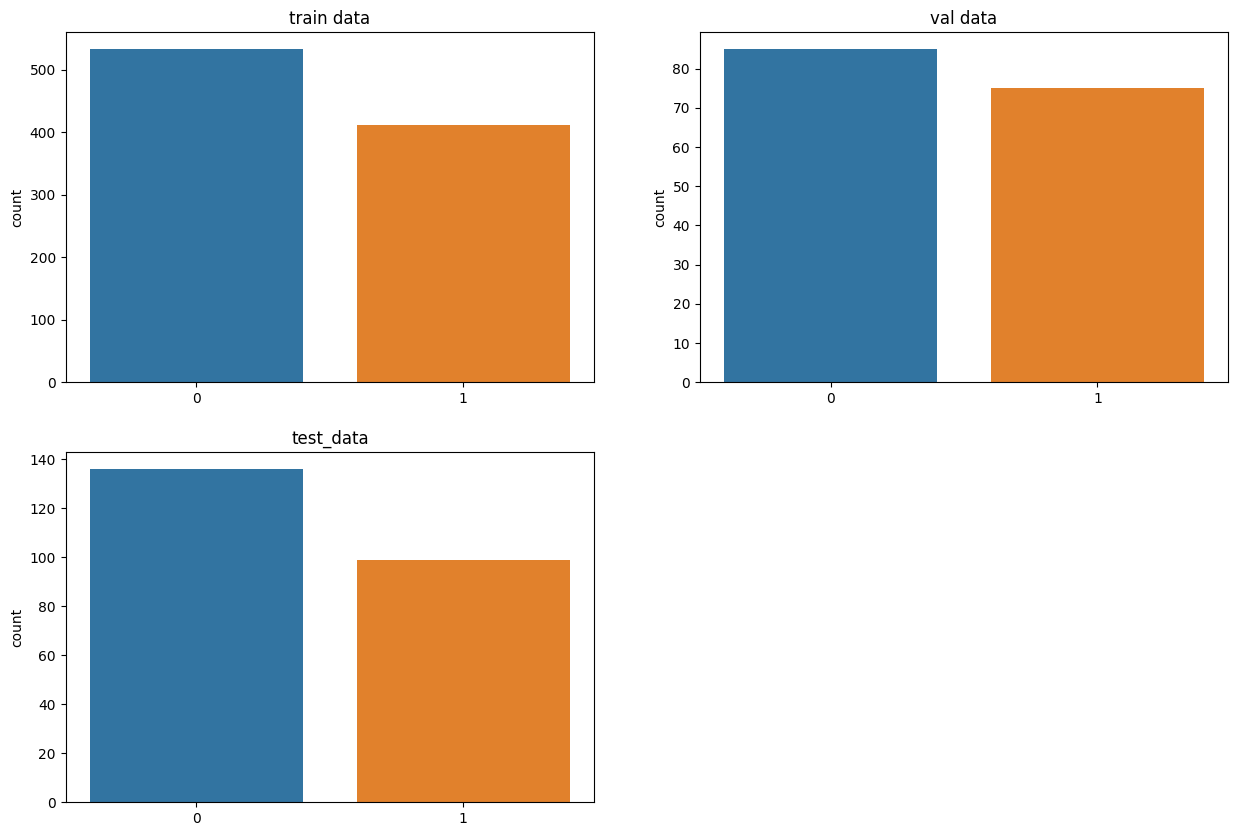

In [35]:
# check if the dataset is balanced
plt.figure(figsize = (15,10))
data_labels_list = {'train data':train_labels  , 'val data':val_labels,'test_data' :test_labels}
i= 0
for key , d in data_labels_list.items():
  i= i+1
  plt.subplot(2,2,i)
  sns.countplot(x = d)
  plt.title(key)
  plt.plot()
# show the plots
plt.show()

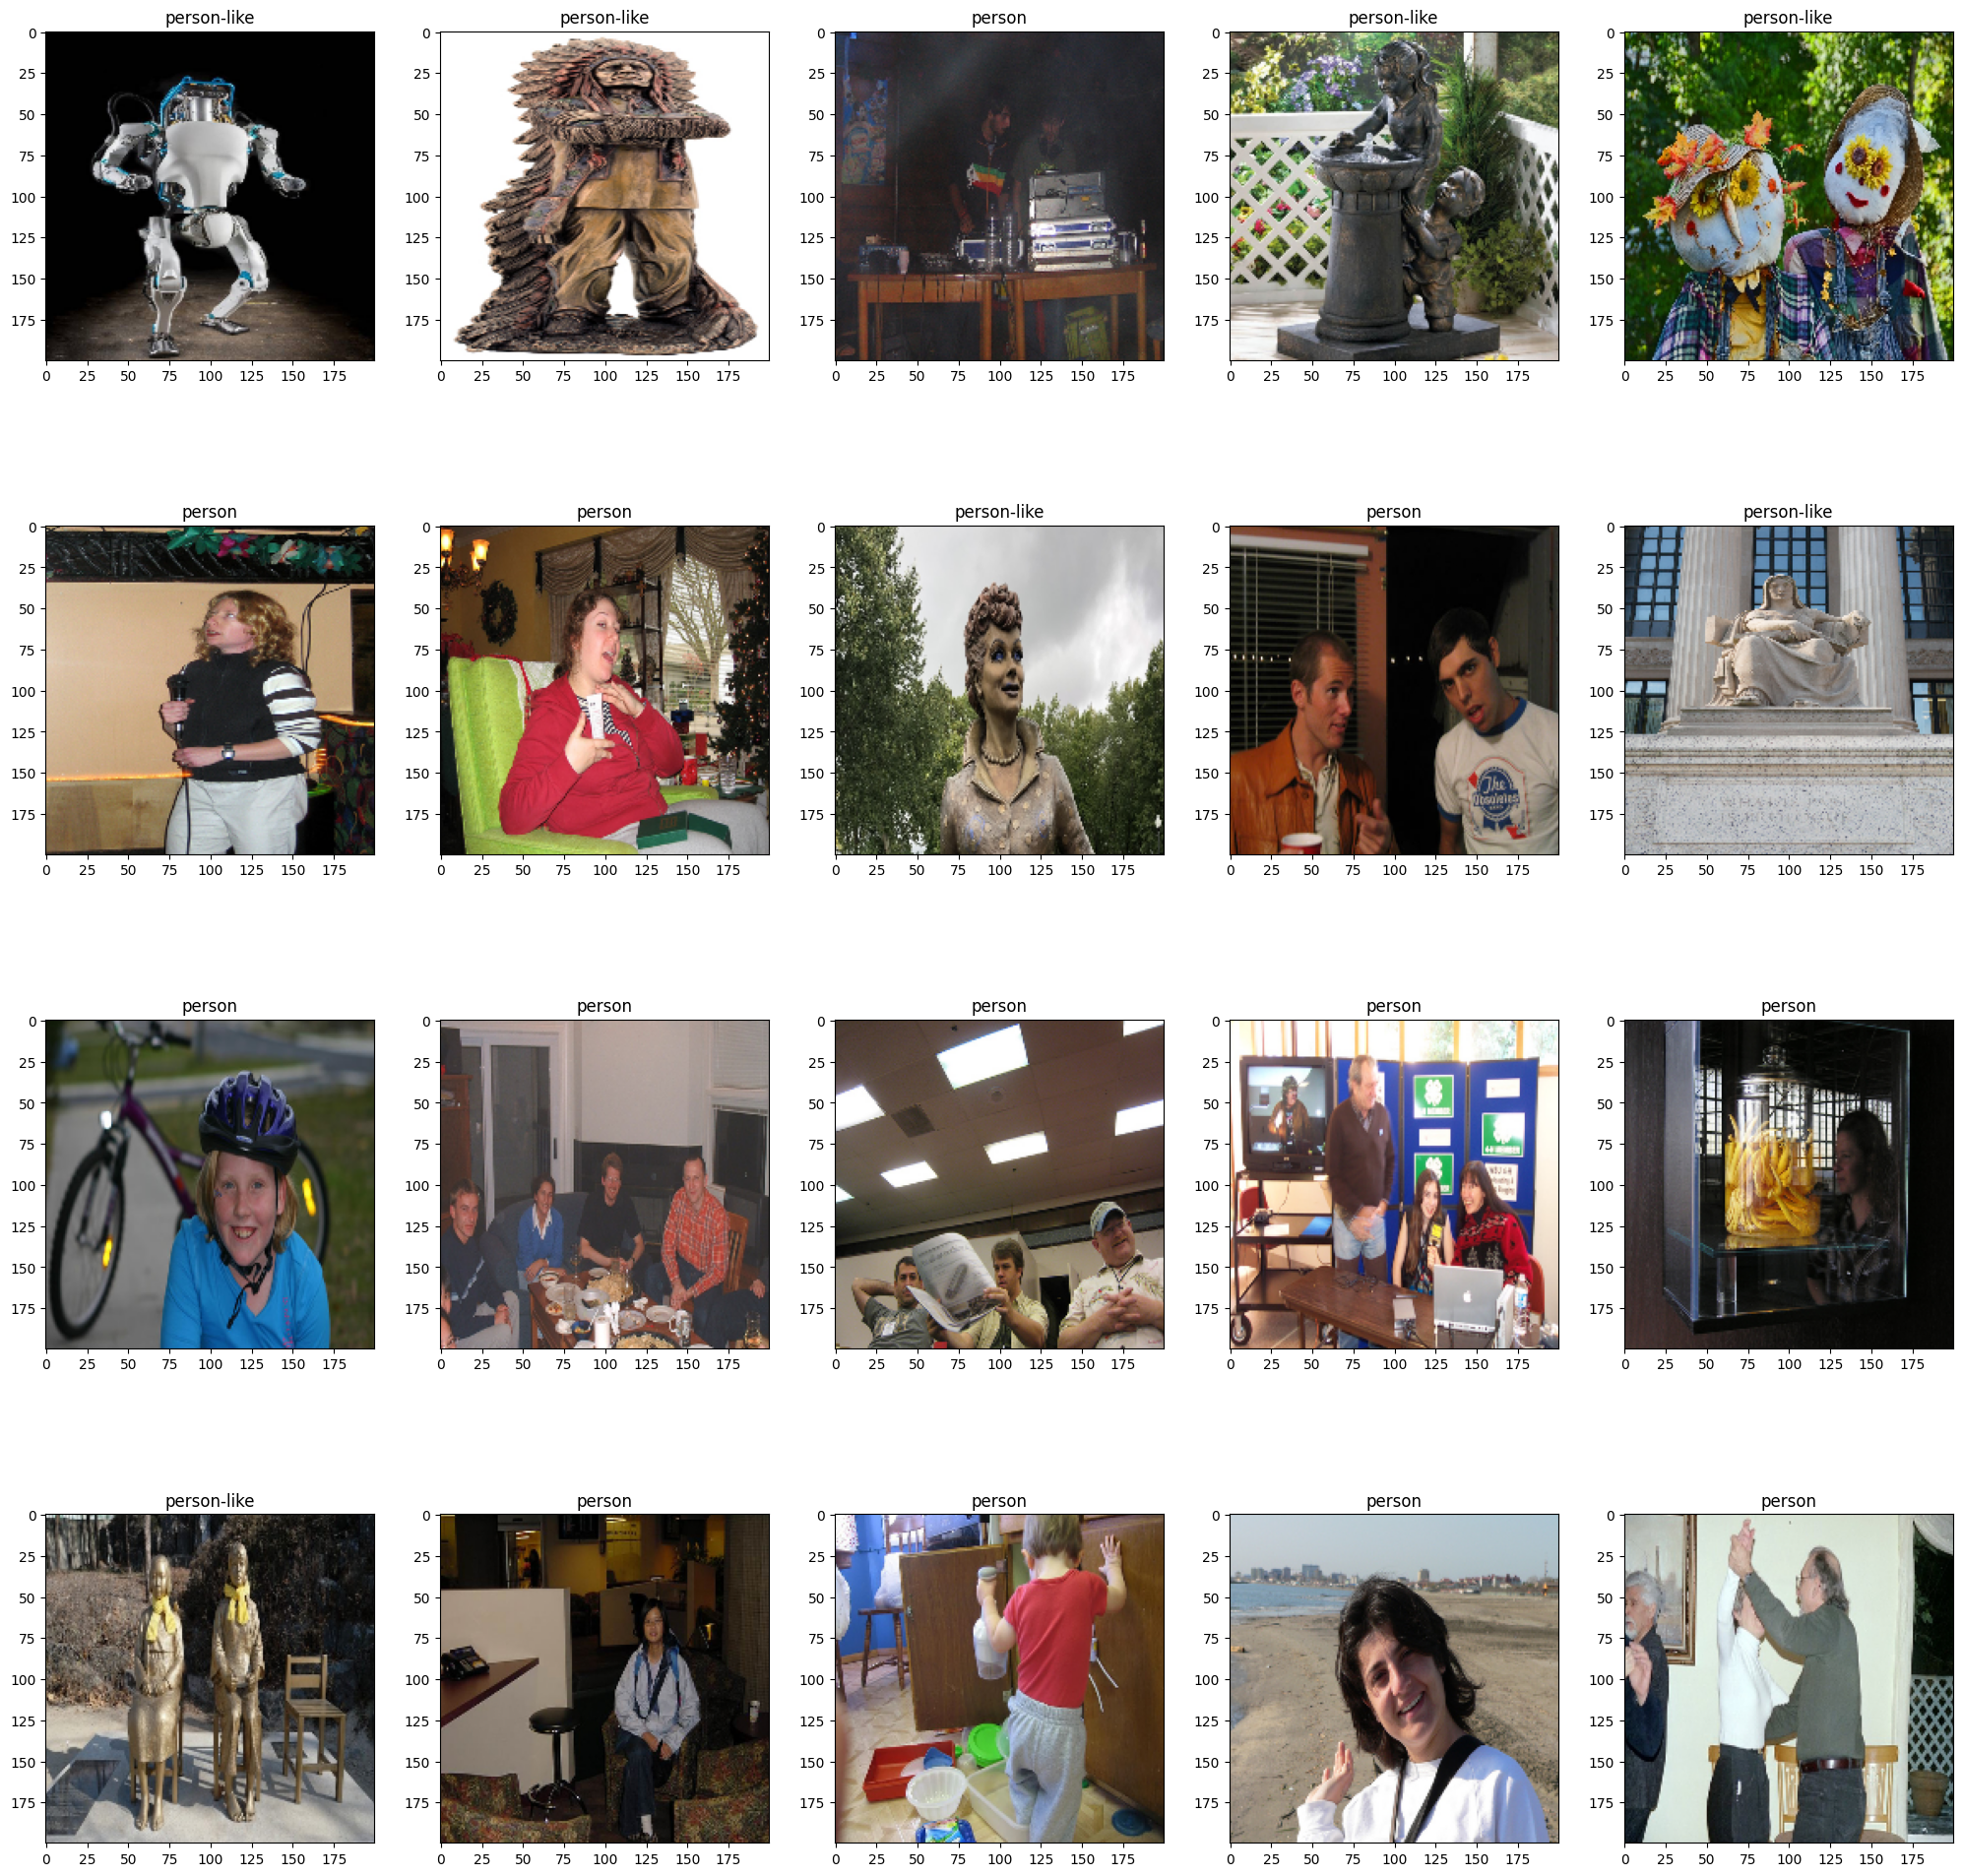

In [7]:
# let's do some plots
plt.figure(figsize= (25 , 25))
for i  , index in enumerate (np.random.randint(0 , len(train_images), 20)):
  plt.subplot(4 , 5 , i+1)
  image_rgb = cv2.cvtColor(train_images[index], cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
  plt.title( class_names[train_labels[index]])

In [8]:
'''
This part is just to get a little familiar with ElementTree library
'''

# get the content of an XML file
xml_file_path = '/content/Train/Train/Annotations/image (1).xml'

result  = ElementTree.parse(xml_file_path)
# convert to string
xml_string = ElementTree.tostring(result.getroot())
xml_string

b'<annotation>\n\t<folder>VOC2012</folder>\n\t<filename>image (1).xml</filename>\n\t<source>\n\t\t<database>The VOC2008 Database</database>\n\t\t<annotation>PASCAL VOC2008</annotation>\n\t\t<image>flickr</image>\n\t</source>\n\t<size>\n\t\t<width>500</width>\n\t\t<height>442</height>\n\t\t<depth>3</depth>\n\t</size>\n\t<segmented>0</segmented>\n\t<object>\n\t\t<name>person</name>\n\t\t<pose>Unspecified</pose>\n\t\t<truncated>1</truncated>\n\t\t<occluded>0</occluded>\n\t\t<bndbox>\n\t\t\t<xmin>158</xmin>\n\t\t\t<ymin>44</ymin>\n\t\t\t<xmax>289</xmax>\n\t\t\t<ymax>167</ymax>\n\t\t</bndbox>\n\t\t<difficult>0</difficult>\n\t</object>\n</annotation>'

In [9]:
'''
This part is just to get a little familiar with ElementTree library
'''

objects = result.findall('object')
for i , obj in enumerate(objects):
  name =objects[i].find('name').text
  pose = objects[i].find('pose').text
  print('name:',name)
  print('pose:',pose)


name: person
pose: Unspecified



3.   <b>Model</b>

In [10]:
#Convolutional_model function
def convolutional_model():
  # Define the model
  model = tf.keras.models.Sequential([

      # Add convolution  and pool layers to extract features from images
      tf.keras.layers.Conv2D(16, kernel_size=(3,3) , activation ='relu' , input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(32, kernel_size=(3,3) , activation ='relu'),
      tf.keras.layers.MaxPooling2D((2,2)),
      tf.keras.layers.Conv2D(64, kernel_size=(3,3) , activation ='relu'),


      # Add more layers and configure the model
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units = 128  , activation='relu'),
      tf.keras.layers.Dense(units = 2)



  ])

  # compile the model
  model.compile(optimizer = 'adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])


  return model


In [11]:
model = convolutional_model()
# check the model's structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [12]:
# let's train the model
history = model.fit(train_images, train_labels,
                     epochs=13,
                     validation_data=(val_images, val_labels))

Epoch 1/13
30/30 [==============================] - 56s 2s/step - loss: 1.8514 - accuracy: 0.4926 - val_loss: 0.6838 - val_accuracy: 0.5312
Epoch 2/13
30/30 [==============================] - 76s 3s/step - loss: 0.6508 - accuracy: 0.5816 - val_loss: 0.6312 - val_accuracy: 0.7125
Epoch 3/13
30/30 [==============================] - 57s 2s/step - loss: 0.5741 - accuracy: 0.7246 - val_loss: 0.6246 - val_accuracy: 0.5688
Epoch 4/13
30/30 [==============================] - 54s 2s/step - loss: 0.4345 - accuracy: 0.8030 - val_loss: 0.5164 - val_accuracy: 0.7250
Epoch 5/13
30/30 [==============================] - 58s 2s/step - loss: 0.2508 - accuracy: 0.9068 - val_loss: 0.5420 - val_accuracy: 0.7437
Epoch 6/13
30/30 [==============================] - 55s 2s/step - loss: 0.1060 - accuracy: 0.9693 - val_loss: 0.5813 - val_accuracy: 0.7312
Epoch 7/13
30/30 [==============================] - 59s 2s/step - loss: 0.0667 - accuracy: 0.9831 - val_loss: 0.7086 - val_accuracy: 0.7063
Epoch 8/13
30/30 [==



4.   <b>Evaluation & Test</b>


In [13]:
def evaluation(history):

  # define the figure size
  plt.figure(figsize = (15,5))

  #loss curve
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'] , label='Train_loss')
  plt.plot(history.history['val_loss'] , label='Val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss curve')
  plt.legend()


  # accuracy curve
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'] , label='Train_accuracy')
  plt.plot(history.history['val_accuracy'] , label='Val_accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy curve')
  plt.legend()


  plt.show()


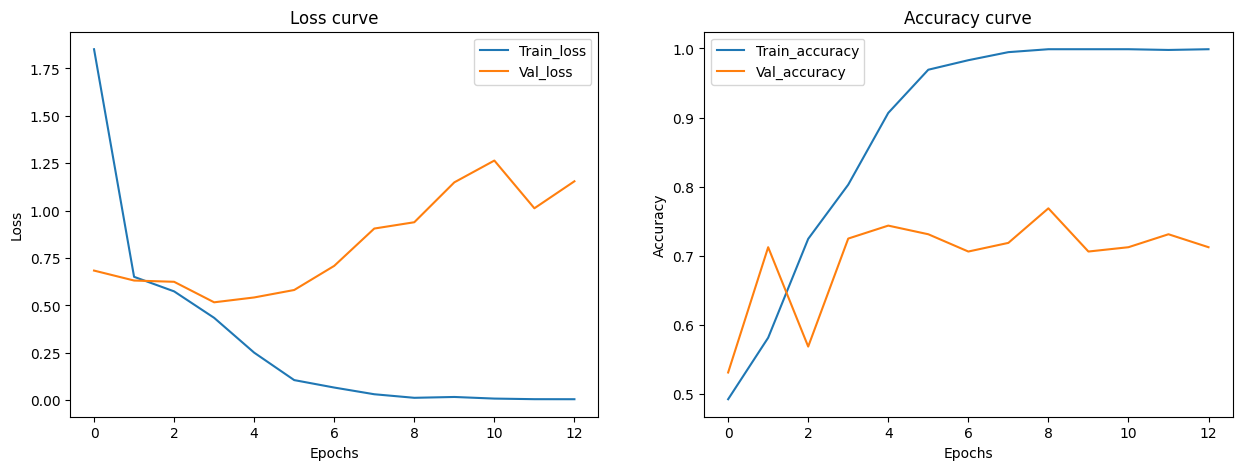

In [14]:
evaluation(history)

In [15]:
#  new Prediction
#(test_images , test_labels)
y_pred = model.predict(test_images)
y_pred

8/8 [==============================] - 3s 359ms/step


array([[ 16.119505  , -11.9514    ],
       [  7.2945757 ,  -4.670334  ],
       [ 16.667278  , -11.6839    ],
       [ 10.776489  ,  -6.71674   ],
       [  3.9683666 ,  -1.5999926 ],
       [ 10.563939  ,  -7.6934404 ],
       [ 11.234057  ,  -7.8655796 ],
       [  9.825107  ,  -6.1069546 ],
       [  3.9635804 ,  -1.4615374 ],
       [  1.7952915 ,   1.47794   ],
       [  7.6909904 ,  -5.8384323 ],
       [  8.809874  ,  -3.9592304 ],
       [  4.2067547 ,  -0.7195364 ],
       [  6.563327  ,  -3.9295702 ],
       [  3.0002005 ,   0.99899495],
       [ 10.477492  ,  -6.922842  ],
       [ -0.55919844,   2.7095327 ],
       [  9.826565  ,  -6.6070304 ],
       [  6.0759583 ,  -4.4437838 ],
       [  4.901552  ,  -0.10100141],
       [  4.3899035 ,  -2.6603146 ],
       [  0.24206093,   2.2865102 ],
       [  6.178285  ,  -3.1362717 ],
       [ 11.217936  ,  -7.905097  ],
       [ -1.0714048 ,   2.3676052 ],
       [  0.91112524,   1.0789775 ],
       [  1.1583279 ,   0.665915  ],
 

[-4.776785  5.583581]
1


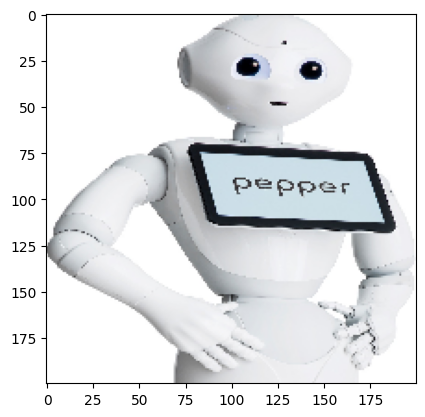

In [16]:
# quick test
print(y_pred[81])
print(test_labels[81])
image_rgb = cv2.cvtColor(test_images[81], cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


In [17]:
#Converting Probabilities into Understandable Results
predicted_target =[]
for y in y_pred:
  # returns the indice of the maximun values 0 or 1
  label= np.argmax(y)
  predicted_target.append(label)

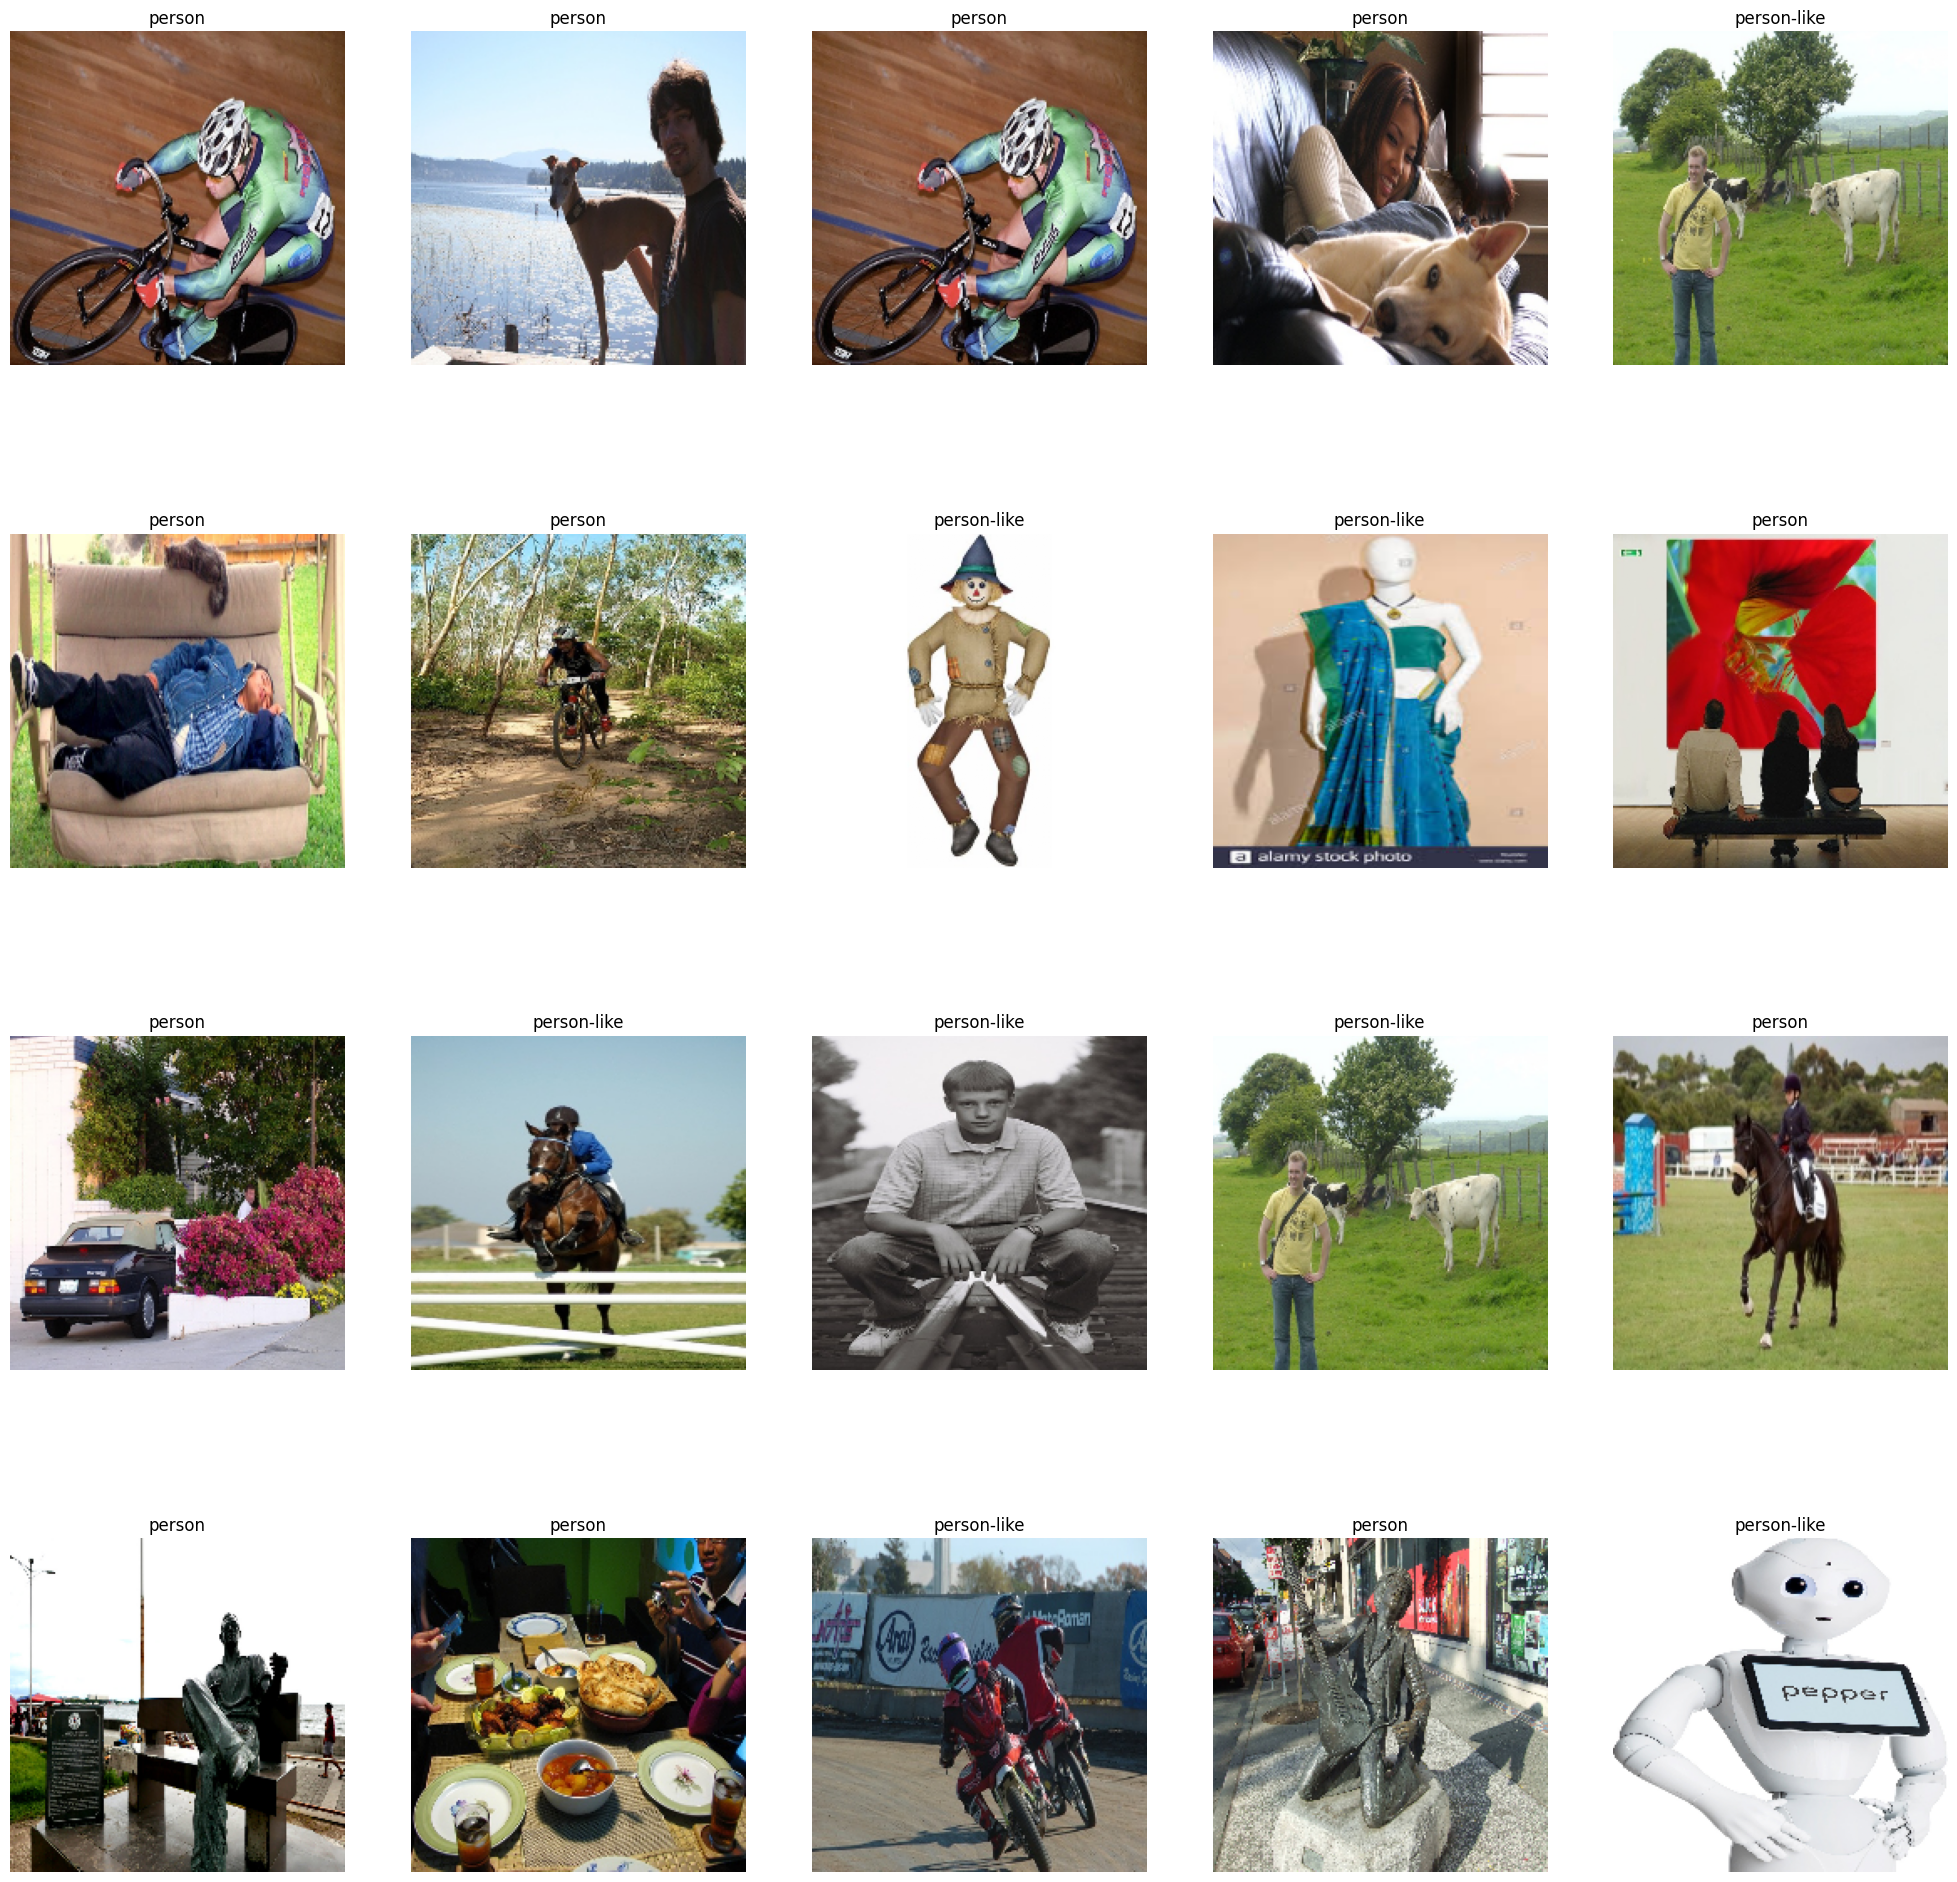

In [18]:
# let's do some test plots
plt.figure(figsize= (25 , 25))
for i  , index in enumerate ( np.random.randint(0 , len(test_images), 20)):
    plt.subplot(4 , 5 , i+1)
    # Convert the BGR  image to RGB
    image_rgb = cv2.cvtColor(test_images[index], cv2.COLOR_BGR2RGB)
    # show the image
    plt.imshow(image_rgb)
    # get the predicted label
    plt.title( class_names[predicted_target[index]])
    # Remove axis
    plt.axis('off')

**Summary**: </br>

> This code performs pedestrian classification, detecting people or similar objects. Feel free to contribute and enhance the code for even better results. Additionally, in a subsequent step, pedestrian detection can be implemented.
